<a href="https://colab.research.google.com/github/sviteribuben/ML_01/blob/main/jun_ml_linear_regression_II_hw_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Урок 3. Домашняя работа

**Задание простого уровня** Загрузите данные из файла `non_linear.csv` и сгенерируйте данные до степени *degree = 8* включительно. Обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных, используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей. Постройте два столбчатых графика, на которых отобразите величину коэффициентов для Ridge регрессии и Lasso регрессии в виде столбиков.

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:
![coeff_example](https://pp.userapi.com/c850136/v850136613/19282c/OfwruuxOkPw.jpg)

# Новый раздел

# Новый раздел

In [ ]:
# -- ВАШ КОД ТУТ

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
sns.set(rc={'figure.figsize':(18,8)})
palette = plt.get_cmap('Dark2')

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_01/non_linear.csv', sep=',')
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


In [ ]:
def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([source_data**n for n in range(1, degree + 1)]).T

In [ ]:
# coef_ на диапазоне степеней полиномо от 1 до 8]  
for degree in range(1, 9):
  X = generate_degrees(data['x_train'], degree)
  y = data.y_train.values
  model_r = Ridge(alpha=0.8).fit(X, y)
  model_l = Lasso(alpha=0.8).fit(X, y)
  print(degree)
  print(f'Lasso.coef_ {model_l.coef_}')
  print(f'Ridge.coef_{model_l.coef_}', '\n')

1
Lasso.coef_ [-0.06401598]
Ridge.coef_[-0.06401598] 

2
Lasso.coef_ [-0.         -0.04176295]
Ridge.coef_[-0.         -0.04176295] 

3
Lasso.coef_ [-0.         -0.04176295 -0.        ]
Ridge.coef_[-0.         -0.04176295 -0.        ] 

4
Lasso.coef_ [-0.         -0.         -0.05814716  0.00894078]
Ridge.coef_[-0.         -0.         -0.05814716  0.00894078] 

5
Lasso.coef_ [-0.         -0.         -0.01945922 -0.00777652  0.00175685]
Ridge.coef_[-0.         -0.         -0.01945922 -0.00777652  0.00175685] 

6
Lasso.coef_ [-0.         -0.         -0.00524475 -0.00962282  0.00085428  0.0001397 ]
Ridge.coef_[-0.         -0.         -0.00524475 -0.00962282  0.00085428  0.0001397 ] 

7
Lasso.coef_ [-0.00000000e+00 -0.00000000e+00 -9.00147959e-03 -8.66603460e-03
  8.60647487e-04  1.42063679e-04 -2.26525059e-06]
Ridge.coef_[-0.00000000e+00 -0.00000000e+00 -9.00147959e-03 -8.66603460e-03
  8.60647487e-04  1.42063679e-04 -2.26525059e-06] 

8
Lasso.coef_ [-0.00000000e+00 -0.00000000e+00 -1.236

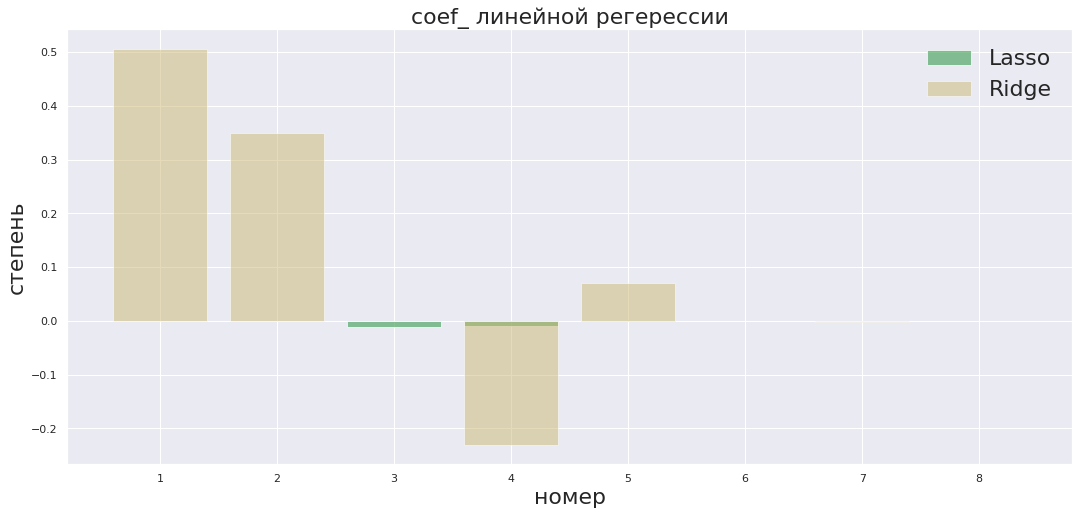

In [ ]:
degree = 8
X = generate_degrees(data.x_train, degree)
y = data.y_train.values
model_lasso = Lasso(alpha=0.8).fit(X, y)
model_ridge = Ridge(alpha=0.8).fit(X, y)
fig, subplot = plt.subplots()
subplot.bar(np.linspace(1, degree, degree), model_lasso.coef_, color='g', alpha = 0.7)
subplot.bar(np.linspace(1, degree, degree), model_ridge.coef_, color='y', alpha = 0.5)
subplot.set_title('coef_ линейной регерессии' , fontsize=22)
subplot.set_xlabel('номер' , fontsize=22)
subplot.set_ylabel('степень', fontsize=22)
subplot.legend(['Lasso', 'Ridge'], fontsize=22)
plt.show(); 

Коэффициенты model_lasso.coef_ сильно меньше чем **model_ridge.coef_** при увеличении степени ridge стремиться к нулю. 

Пока что мы пользуемся моделями с регуляризацией как "черным ящиком" - знаем, как применять и это работает! Для успешного решения задач этого достаточно. Если вам, как и мне, интересно *почему* это работает - добро пожаловать во второй урок, где Вас ждёт больше кода и формул!